In [1]:
%matplotlib inline
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
records = pd.read_csv('../../data/fucking_final_dataset.csv')

In [3]:
records.head(1)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1,Unnamed: 0.1.1,control_number,title,uniform_title,author,publisher,pub_location,pub_year,translation,prev_language,title_auth_slug,canonical_title,canonical_author,slug,canonical_city,canonical_country,full_text_slug
0,0,0,0,0,1000686,chao,NaN,"sauvajon, marc-gilbert",escelicer,madrid,1972,NaN,fre,"chao|sauvajon, marc-gilbert",chao,"sauvajon, marc-gilbert","madrid,spain",madrid,spain,"chao,sauvajon, marc-gilbert,madrid,1972,escelicer"


In [4]:
plt.rcParams['figure.figsize'] = (16.0, 8.0)

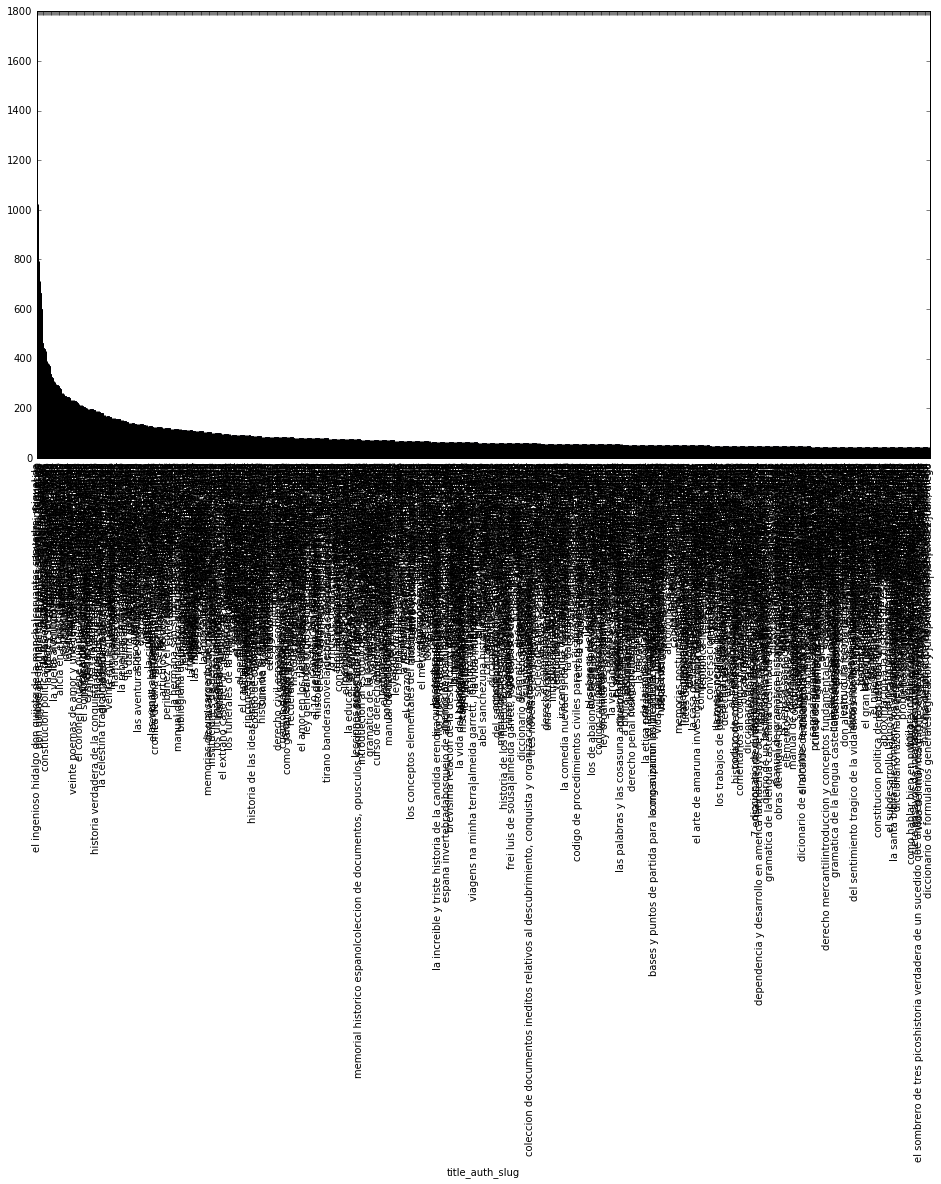

In [6]:
records.groupby('title_auth_slug').count()['control_number'].sort_values(inplace=False, ascending=False).ix[:50].plot(kind="bar")

In [ ]:
len(records.groupby('title_auth_slug').count()['control_number'])

In [7]:
d = {k: len(v) for k, v in records.groupby("title_auth_slug").groups.items()}

def prob_dist(d):
    probs = {}
    for k, v in d.items():
        probs.setdefault(v, 0)
        probs[v] += 1
    return probs


probs = prob_dist(d)

In [8]:
plt.rcParams['figure.figsize'] = (12.0, 8.0)

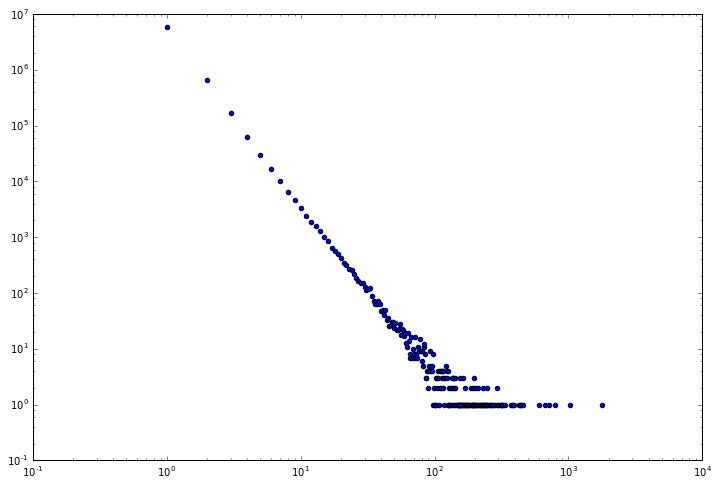

In [9]:
plt.xscale("log")
plt.yscale("log")
plt.scatter(list(probs.keys()), list(probs.values()))

In [7]:
top_slugs = records.groupby('title_auth_slug').count()['control_number'].sort_values(inplace=False, ascending=False).ix[:1000].index

In [13]:
top_slugs

Index(['el ingenioso hidalgo don quijote de la mancha|cervantes saavedra, miguel de',
       'boletin informativo', 'el lazarillo de tormes',
       'novelas ejemplares|cervantes saavedra, miguel de',
       'don quijote de la mancha|cervantes saavedra, miguel de', 'boletin',
       'martin fierro|hernandez, jose', 'la iliada|homer',
       'la divina comedia|dante alighieri',
       'la isla del tesoro|stevenson, robert louis',
       'la celestina|rojas, fernando de',
       'constitucion politica de los estados unidos mexicanos|mexico',
       'codigo civil|espana', 'rimas y leyendas|becquer, gustavo adolfo',
       'la vida es sueno|calderon de la barca, pedro',
       'libro de buen amor|ruiz, juan', 'el principe|machiavelli, niccolo',
       'maria|isaacs, jorge', 'robinson crusoe|defoe, daniel',
       'las aventuras de tom sawyer|twain, mark',
       'marianela|perez galdos, benito',
       'la vuelta al mundo en ochenta dias|verne, jules', 'la odisea|homer',
       'pepita jim

In [8]:
top_producers = records[records.title_auth_slug.isin(top_slugs)]

In [9]:
group_top_producers = top_producers.sort_values('pub_year').groupby(['title_auth_slug', 'pub_year']).count()['control_number']

In [10]:
top_producer_df1 = pd.DataFrame({
    'el ingenioso hidalgo don quijote de la mancha|cervantes saavedra, miguel de': group_top_producers.ix['el ingenioso hidalgo don quijote de la mancha|cervantes saavedra, miguel de'],
    'el lazarillo de tormes': group_top_producers.ix['novelas ejemplares,cervantes saavedra, miguel de'],
    'novelas ejemplares|cervantes saavedra, miguel de': group_top_producers.ix['don quijote de la mancha,cervantes saavedra, miguel de'],
    'don quijote de la mancha|cervantes saavedra, miguel de' group_top_producers.ix['martin fierro,hernandez, jose'],
    'martin fierro|hernandez, jose': group_top_producers.ix['la celestina,rojas, fernando de'],
    'la iliada|homer': group_top_producers.ix['libro de buen amor,ruiz, juan'],
    'la divina comedia|dante alighieri': group_top_producers.ix['la isla del tesoro,stevenson, robert louis'],
    'la isla del tesoro|stevenson, robert louis': group_top_producers.ix['constitucion politica de los estados unidos mexicanos,mexico'],
    'la celestina|rojas, fernando de': group_top_producers.ix['la vida es sueno,calderon de la barca, pedro'],
    'poema de mio cid,nan': group_top_producers.ix['poema de mio cid,nan'],
#     'orlando furioso|ariosto, lodovico': group_top_producers.ix['orlando furioso|ariosto, lodovico']
    }).fillna(0)

KeyError: 'orlando furioso|ariosto, lodovico'

In [ ]:
# Looking at orlando and the celestina

In [3]:
top_16th = records.sort_values('pub_year').groupby(['title_auth_slug', 'pub_year']).count()['control_number']

In [8]:
top_16th.ix['tragicomedia de calisto y melibea. enla ql se cotiene de mas de su agradable dulce estilo muchas sentencias filosofales: auisosmuy necessarios a macebos ... nueuamente anadido el tractado de centurio. [with woodcuts.] g.l']

pub_year
1502    3
1518    1
1523    1
1525    1
1526    1
1529    1
1530    1
1534    1
1540    1
1545    1
1553    1
1558    1
1568    1
1570    1
Name: control_number, dtype: int64

In [11]:
top_16th.ix['tragicomedia de calisto y melibea|rojas, fernando de']

pub_year
1539    1
1545    1
1568    1
1573    1
1595    1
1997    2
1998    1
1999    1
2000    1
2005    1
2009    2
Name: control_number, dtype: int64

In [9]:
top_16th.ix['la celestina|rojas, fernando de']

pub_year
1886     1
1895     1
1900     1
1910     1
1913     6
1923     1
1925     1
1931     6
1935     1
1941     2
1942     1
1944     2
1945     1
1949     2
1951     2
1952     2
1954     2
1955     2
1956     1
1958     3
1959     8
1960     4
1961     4
1962     5
1963     8
1964     9
1965     2
1966     7
1967     8
1968    11
        ..
1985     7
1986     5
1987     6
1988     8
1989     5
1990     8
1991     5
1992     3
1993     5
1994     7
1995     5
1996    11
1997    10
1998     6
1999    16
2000     5
2001     5
2002    12
2003     2
2004     9
2005     6
2006     3
2007     6
2008     5
2009     5
2010     1
2011     4
2012     5
2013     2
2014     1
Name: control_number, dtype: int64

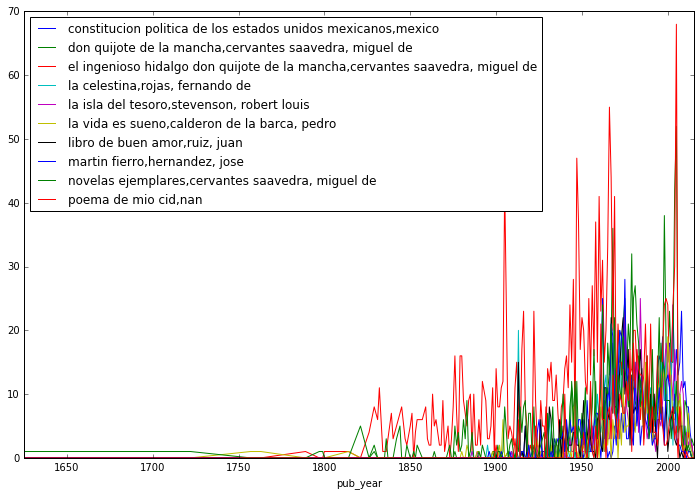

In [27]:
top_producer_df1.plot()

In [29]:
top_producer_df2 = pd.DataFrame({
    'lazarillo de tormes,nan': group_top_producers.ix['lazarillo de tormes,nan'],
    'la divina comedia,dante alighieri': group_top_producers.ix['la divina comedia,dante alighieri'],
    'maria,isaacs, jorge': group_top_producers.ix['maria,isaacs, jorge'],
    'pepita jimenez,valera, juan': group_top_producers.ix['pepita jimenez,valera, juan'],
    'el principe,machiavelli, niccolo': group_top_producers.ix['el principe,machiavelli, niccolo'],
    'robinson crusoe,defoe, daniel': group_top_producers.ix['robinson crusoe,defoe, daniel'],
    'marianela,perez galdos, benito': group_top_producers.ix['marianela,perez galdos, benito'],
    'don segundo sombra,guiraldes, ricardo': group_top_producers.ix['don segundo sombra,guiraldes, ricardo'],
    'episodios nacionales,perez galdos, benito': group_top_producers.ix['episodios nacionales,perez galdos, benito'],
    'rimas,becquer, gustavo adolfo': group_top_producers.ix['rimas,becquer, gustavo adolfo'],
}).fillna(0)

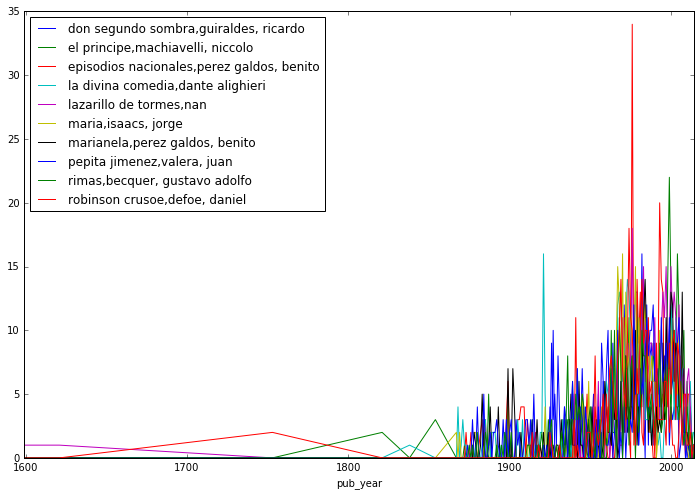

In [30]:
top_producer_df2.plot()

In [ ]:
top_producer_df3 = pd.DataFrame({
    'sagrada biblia,nan': group_top_producers.ix['sagrada biblia,nan'],
    'la regenta,alas, leopoldo': group_top_producers.ix['la regenta,alas, leopoldo'],
    'fausto,goethe, johann wolfgang von': group_top_producers.ix['fausto,goethe, johann wolfgang von'],
    'rimas y leyendas,becquer, gustavo adolfo': group_top_producers.ix['rimas y leyendas,becquer, gustavo adolfo'],
    'summa artishistoria general del arte,pijoan, jose': group_top_producers.ix['summa artishistoria general del arte,pijoan, jose'],
    'cien anos de soledad,garcia marquez, gabriel': group_top_producers.ix['cien anos de soledad,garcia marquez, gabriel'],
    'alicia en el pais de las maravillas,carroll, lewis': group_top_producers.ix['alicia en el pais de las maravillas,carroll, lewis'],
    'historia verdadera de la conquista de la nueva espana,diaz del castillo, bernal': group_top_producers.ix['historia verdadera de la conquista de la nueva espana,diaz del castillo, bernal'],
    'derecho civil espanol, comun y foral,castan tobenas, jose': group_top_producers.ix['derecho civil espanol, comun y foral,castan tobenas, jose'],
    'obras completas,ortega y gasset, jose': group_top_producers.ix['obras completas,ortega y gasset, jose'],
}).fillna(0)

In [ ]:
# top_producer_df3.plot()

In [31]:
top_producer_df4 = pd.DataFrame({
    'los tres mosqueteros,dumas, alexandre': group_top_producers.ix['los tres mosqueteros,dumas, alexandre'],
    'mujercitas,alcott, louisa may': group_top_producers.ix['mujercitas,alcott, louisa may'],
    'la voragine,rivera, jose eustasio': group_top_producers.ix['la voragine,rivera, jose eustasio'],
    'cumbres borrascosas,bronte, emily': group_top_producers.ix['cumbres borrascosas,bronte, emily'],
    'el principito,saint-exupery, antoine de': group_top_producers.ix['el principito,saint-exupery, antoine de'],
    'don juan tenorio,zorrilla, jose': group_top_producers.ix['don juan tenorio,zorrilla, jose'],
    'dona barbara,gallegos, romulo': group_top_producers.ix['dona barbara,gallegos, romulo'],
    'el conde lucanor,juan manuel': group_top_producers.ix['el conde lucanor,juan manuel'],
    'os lusiadas,camoes, luis de': group_top_producers.ix['os lusiadas,camoes, luis de'],
    'entremeses,cervantes saavedra, miguel de': group_top_producers.ix['entremeses,cervantes saavedra, miguel de'],
    'las aventuras de tom sawyer,twain, mark': group_top_producers.ix['las aventuras de tom sawyer,twain, mark'],
}).fillna(0)

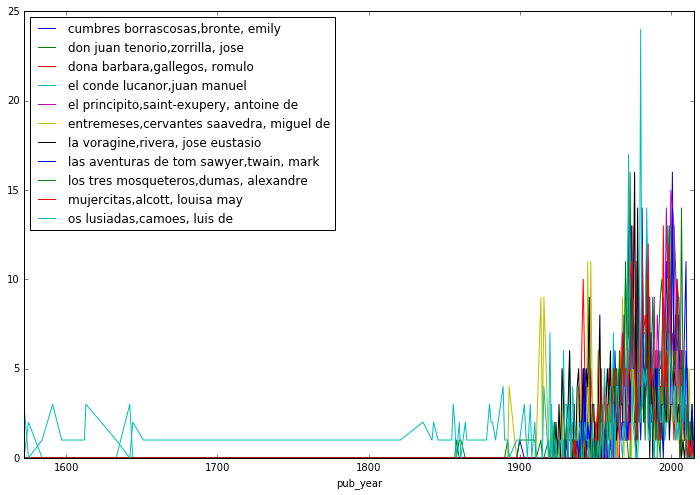

In [32]:
top_producer_df4.plot()

In [ ]:
top_producer_df5 = pd.DataFrame({
    '': group_top_producers.ix[''],
    '': group_top_producers.ix[''],
    '': group_top_producers.ix[''],
    '': group_top_producers.ix[''],
    '': group_top_producers.ix[''],
    '': group_top_producers.ix[''],
    '': group_top_producers.ix[''],
    '': group_top_producers.ix[''],
    '': group_top_producers.ix[''],
    '': group_top_producers.ix[''],
}).fillna(0)

In [ ]:
# top_producer_df5.plot()